In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12967,-121.32,38.70,16.0,3592.0,642.0,1740.0,629.0,3.0703,126000.0,INLAND
15970,-122.41,37.71,28.0,5015.0,1240.0,3900.0,1029.0,1.2269,181900.0,NEAR BAY
19462,-120.99,37.68,30.0,1975.0,375.0,732.0,326.0,2.6932,94900.0,INLAND
15820,-122.42,37.75,52.0,1855.0,611.0,1715.0,614.0,2.1289,250000.0,NEAR BAY
20394,-118.87,34.22,14.0,3108.0,451.0,1566.0,434.0,6.2423,305400.0,<1H OCEAN


In [4]:
housing_data = housing_data.dropna()

In [5]:
housing_data.shape

(20433, 10)

In [6]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [7]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [8]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [12]:
housing_data.shape

(19475, 14)

In [13]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6892,-118.09,34.04,18.0,5580.0,1369.0,3842.0,1276.0,3.6512,168500.0,1,0,0,0,0
9242,-120.07,36.98,12.0,1790.0,379.0,1399.0,397.0,2.5388,59600.0,0,1,0,0,0
20342,-119.04,34.23,21.0,9807.0,1614.0,4199.0,1554.0,5.0145,246600.0,1,0,0,0,0
18255,-122.09,37.38,34.0,1959.0,342.0,849.0,357.0,6.2884,414700.0,0,0,0,1,0
17590,-121.91,37.31,46.0,3052.0,587.0,1373.0,590.0,4.7287,340000.0,1,0,0,0,0


In [14]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [15]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [18]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [20]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [21]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.6156142095872006


In [22]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [24]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND       -2.732516e+17
ocean_proximity_NEAR BAY     -2.732516e+17
ocean_proximity_<1H OCEAN    -2.732516e+17
ocean_proximity_NEAR OCEAN   -2.732516e+17
ocean_proximity_ISLAND       -2.732516e+17
longitude                    -2.433289e+04
latitude                     -2.240532e+04
population                   -2.946335e+01
total_rooms                  -7.041326e+00
households                    3.448392e+01
total_bedrooms                9.699336e+01
housing_median_age            9.399887e+02
median_income                 3.862382e+04
dtype: float64


In [26]:
y_pred = linear_model.predict(x_test)

In [27]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
16889,285472.0,353800.0
18772,59200.0,59800.0
2650,168576.0,70500.0
17527,159040.0,212500.0
6603,209120.0,153500.0
16982,302592.0,282000.0
17076,138784.0,270000.0
16511,133568.0,182400.0
17419,207648.0,128100.0
14344,153248.0,112500.0


In [28]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.6013238433938979


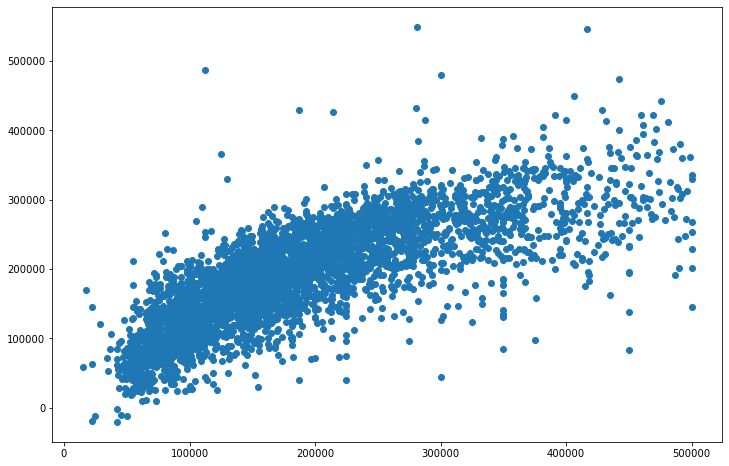

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [33]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [34]:
df_pred_actual_sample.head()

,index,predicted,actual
0,13344,109248.0,96900.0
1,9141,166656.0,319100.0
2,16071,256832.0,319100.0
3,20111,128000.0,112500.0
4,12847,121632.0,84000.0


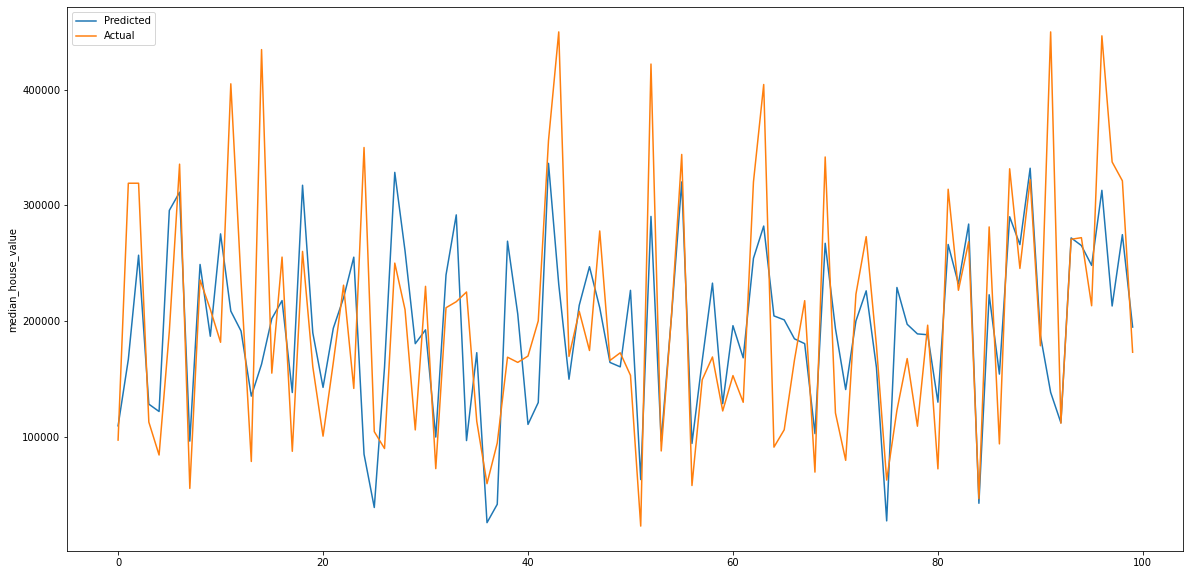

In [35]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()